In [1]:
# importing libraries 
import speech_recognition as sr 
import os 
from pydub import AudioSegment
from pydub.silence import split_on_silence


# create a speech recognition object
r = sr.Recognizer()

# a function that splits the audio file into chunks
# and applies speech recognition
def get_large_audio_transcription(path):
    """
    Splitting the large audio file into chunks
    and apply speech recognition on each of these chunks
    """
    # open the audio file using pydub
    sound = AudioSegment.from_wav(path)  
    # split audio sound where silence is 700 miliseconds or more and get chunks
    chunks = split_on_silence(sound,
        # experiment with this value for your target audio file
        min_silence_len = 500,
        # adjust this per requirement
        silence_thresh = sound.dBFS-14,
        # keep the silence for 1 second, adjustable as well
        keep_silence=500,
    )
    folder_name = "audio-chunks"
    # create a directory to store the audio chunks
    if not os.path.isdir(folder_name):
        os.mkdir(folder_name)
    whole_text = ""
    # process each chunk 
    for i, audio_chunk in enumerate(chunks, start=1):
        # export audio chunk and save it in
        # the `folder_name` directory.
        chunk_filename = os.path.join(folder_name, f"chunk{i}.wav")
        audio_chunk.export(chunk_filename, format="wav")
        # recognize the chunk
        with sr.AudioFile(chunk_filename) as source:
            audio_listened = r.record(source)
            # try converting it to text
            try:
                text = r.recognize_google(audio_listened,language="tr-TR")
            except sr.UnknownValueError as e:
                continue
            except:
                continue
            else:
                whole_text += text + " "
                #text = f"{text.capitalize()}. "
                #print(chunk_filename, ":", text)
    # return the text for all chunks detected
    return whole_text



/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


"""
I took code the from 
https://github.com/x4nth055/pythoncode-tutorials/blob/master/machine-learning/speech-recognition/long_audio_recognizer.py
"""

In [2]:
import pandas as pd

Turing audio data tp text data

In [3]:
filename = "/Users/aydin/Desktop/speech01.wav"
speech01 = get_large_audio_transcription(filename)

In [4]:
filename = "/Users/aydin/Desktop/speech02.wav"
speech02 = get_large_audio_transcription(filename)

In [5]:
filename = "/Users/aydin/Desktop/speech03.wav"
speech03 = get_large_audio_transcription(filename)

In [6]:
filename = "/Users/aydin/Desktop/speech04.wav"
speech04 = get_large_audio_transcription(filename)

In [7]:
filename = "/Users/aydin/Desktop/speech05.wav"
speech05 = get_large_audio_transcription(filename)

In [8]:
filename = "/Users/aydin/Desktop/speech06.wav"
speech06 = get_large_audio_transcription(filename)

In [9]:
filename = "/Users/aydin/Desktop/speech07.wav"
speech07 = get_large_audio_transcription(filename)

In [10]:
filename = "/Users/aydin/Desktop/speech08.wav"
speech08 = get_large_audio_transcription(filename)

In [11]:
filename = "/Users/aydin/Desktop/speech09.wav"
speech09 = get_large_audio_transcription(filename)

In [12]:
#making a dataframe 
df = pd.DataFrame(zip([speech01, speech02, speech03, speech04, speech05, speech06, speech07, speech08, speech09],\
                 ["speech01", "speech02", "speech03", "speech04", "speech05", "speech06","speech07", "speech08", "speech09"]), \
             columns=["text","speech"])

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from wordcloud import WordCloud

import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("punkt")

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


lem = WordNetLemmatizer()

import warnings

[nltk_data] Downloading package stopwords to /Users/aydin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/aydin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/aydin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
#vectrozing the data
vectorizer = CountVectorizer()
df_vec = vectorizer.fit_transform(df.text)

In [15]:
#common values
a=pd.DataFrame(df_vec.toarray(), columns=vectorizer.get_feature_names())
a.sum().sort_values(ascending=False).head(20)

bir      882
bu       497
ben      429
da       347
var      342
ya       291
de       286
böyle    273
ne       240
benim    237
için     227
çok      215
ki       209
ama      194
diyor    188
yok      187
şey      185
değil    167
allah    163
bizim    145
dtype: int64

In [16]:
#average used words in speeches
sum(df.text.apply(lambda x : len(x)))/9

29764.333333333332

In [17]:
#average unique used words in speeches
sum(df.text.apply(lambda x : len(set(x.split()))))/9

2260.4444444444443

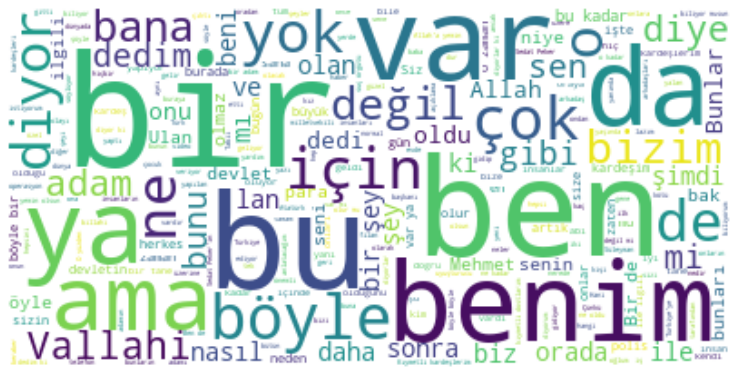

In [18]:
#the most comman words he used as visualize
original = ""
for i in df.text:
    original += i + " "
wordcloud = WordCloud(background_color="white", max_words=1000)
wordcloud.generate(original)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

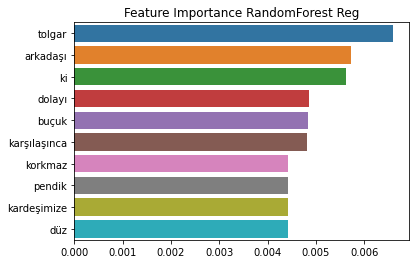

In [21]:
#using random forest model to find words which makes difference
vectorizer_parag = CountVectorizer()
vectorizer_parag.fit(df['text'])
X_train_count = vectorizer_parag.transform(df['text'])

model_two = RandomForestClassifier()
model_two.fit(X_train_count,df['speech'])

feature_imp = pd.Series(model_two.feature_importances_,
                        index=vectorizer_parag.get_feature_names()).sort_values(ascending=False).head(10)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance RandomForest Reg")
plt.show()

In [22]:
stop_words =stopwords.words('turkish')

In [23]:
stop_words

['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [24]:
stop_words.append("ben")
stop_words.append("bir")
stop_words.append("sen")
stop_words.append("sana")
stop_words.append("bana")
stop_words.append("mi")
stop_words.append("benim")
stop_words.append("bizim")
stop_words.append("bunu")
stop_words.append("beni")
stop_words.append("onu")
stop_words.append("senin")
stop_words.append("bunlar")
stop_words.append("herkes")
stop_words.append("onlar")
stop_words.append("size")
stop_words.append("seni")
stop_words.append("bunları")
stop_words.append("musun")
stop_words.append("dedim")
stop_words.append("diyor")
stop_words.append("var")
stop_words.append("böyle")
stop_words.append("yok")
stop_words.append("değil")
stop_words.append("kadar")

In [25]:
def cleaning(data):
    
    #Tokenize
    text_tokens = word_tokenize(data)
    
    #Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    
    #Removing Stopwords
    tokens_without_sw = [t.lower() for t in tokens_without_punc if t.lower() not in stop_words]
    
    #lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [26]:
#defining new column for cleaned data
df['text1']= df.text.apply(cleaning)

In [27]:
#average used words in speeches after cleaning
sum(df.text1.apply(lambda x : len(x)))/9

24738.777777777777

In [28]:
#average unique used words in speeches after cleaning
sum(df.text1.apply(lambda x : len(set(x.split()))))/9

2015.5555555555557

In [29]:
#vectrozing the data
vectorizer = CountVectorizer()
df_vec = vectorizer.fit_transform(df.text1)

In [30]:
a=pd.DataFrame(df_vec.toarray(), columns=vectorizer.get_feature_names())

In [31]:
#common words
a.sum().sort_values(ascending=False).head(20)

adam           139
allah          132
vallahi        125
sonra          122
şimdi          107
orada          104
ilgili         103
olan            99
kardeşlerim     97
zaman           91
olsun           91
tane            90
oldu            88
dedi            88
mehmet          88
lan             83
olur            81
biliyor         74
öyle            74
kıymetli        71
dtype: int64

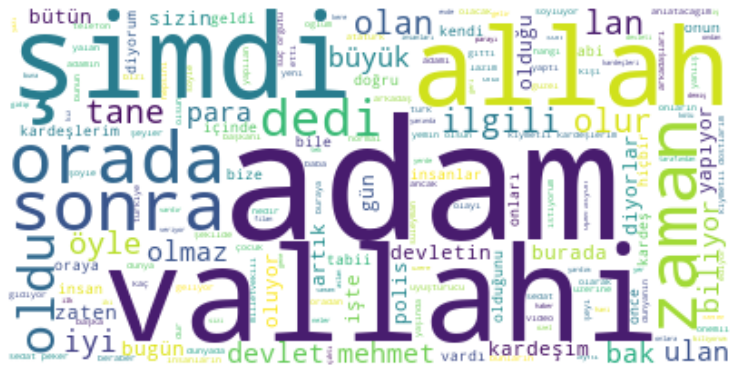

In [32]:
#the most comman words she used as visualize
original = ""
for i in df.text1:
    original += i + " "
wordcloud = WordCloud(background_color="white", max_words=1000)
wordcloud.generate(original)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [33]:
vectorizer_parag = CountVectorizer()
vectorizer_parag.fit(df['text1'])
X_train_count = vectorizer_parag.transform(df['text1'])

In [37]:
model_two = RandomForestClassifier()
model_two.fit(X_train_count,df['speech'])

RandomForestClassifier()

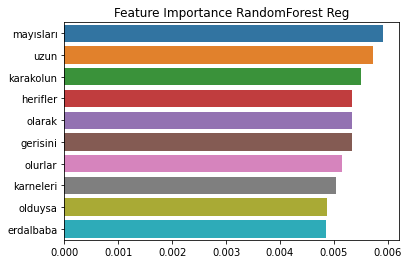

In [38]:
#using random forest model to find words which makes difference for cleaned data
feature_imp = pd.Series(model_two.feature_importances_,
                        index=vectorizer_parag.get_feature_names()).sort_values(ascending=False).head(10)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance RandomForest Reg")
plt.show()

In [39]:
from gensim.models import Word2Vec

In [71]:
x = df['text1']

In [72]:
#analysing speeches by using word emebedding method
model_vec = Word2Vec(x.apply(lambda x: x.split()).array, size = 300)

In [73]:
#train the model
model_vec.train(x.apply(lambda x: x.split()).array, total_examples=len(x.apply(lambda x: x.split()).array), epochs=5000)

(70193217, 143040000)

In [108]:
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [109]:
#checking the functioanlity of the model
#devlet = state, results : 'suç' = crime, 'almak' = take, 'polis' = police, 'saat' =clock 
model_vec.most_similar('devlet')

[('suç', 0.20062127709388733),
 ('almak', 0.18604108691215515),
 ('tamamen', 0.1779567301273346),
 ('polisi', 0.17084598541259766),
 ('saatte', 0.15306639671325684),
 ('abisi', 0.1519971638917923),
 ('iptal', 0.14923270046710968),
 ('dedi', 0.14882056415081024),
 ('müsaade', 0.13883426785469055),
 ('fazla', 0.13869628310203552)]

In [110]:
#millet = nation, results : 'operasyona' = operation, 'milli' = national, 'zarar' = harm, 'ticaret' =trade 
model_vec.most_similar('millet')

[('operasyona', 0.2605016529560089),
 ('milli', 0.2356419861316681),
 ('zarar', 0.2248329222202301),
 ('ticaret', 0.21209301054477692),
 ('kendimi', 0.20963039994239807),
 ('emir', 0.2090652734041214),
 ('yapmaz', 0.1923896074295044),
 ('murat', 0.18801726400852203),
 ('istedi', 0.18704819679260254),
 ('yapabilir', 0.1818808615207672)]

In [111]:
#kitap = book, results : 'asker' = solider, 'kardeşlerimiz' = brothers, 'diyordu' = said, 'ikinci' =second 
model_vec.most_similar('kitap')

[('asker', 0.2325850874185562),
 ('kardeşlerimiz', 0.21623840928077698),
 ('diyordu', 0.21237000823020935),
 ('ikinci', 0.20093753933906555),
 ('mesela', 0.1767849624156952),
 ('gerek', 0.1754288673400879),
 ('geçtim', 0.17430220544338226),
 ('buçuk', 0.17228300869464874),
 ('karşı', 0.17160040140151978),
 ('barış', 0.1584913730621338)]

In [112]:
#asker = solider, results : 'çelik' = either a person or steal, 'okudum' = read, 'kitap' = book, 'eve' =to house 
model_vec.most_similar('asker')

[('çelik', 0.2427166998386383),
 ('okudum', 0.23995986580848694),
 ('kitap', 0.2325851023197174),
 ('eve', 0.22196552157402039),
 ('geçtim', 0.2211880087852478),
 ('herkesi', 0.2188945710659027),
 ('araba', 0.21509012579917908),
 ('eşim', 0.20832383632659912),
 ('başka', 0.20624107122421265),
 ('otururken', 0.19964256882667542)]

In [113]:
#polis = police, results : 'tamam' = ok, 'kadının' = women, 'silah' = gun, 'tolga' = a person
model_vec.most_similar('polis')

[('tamam', 0.1884266436100006),
 ('kadının', 0.17970801889896393),
 ('silah', 0.17778784036636353),
 ('tolga', 0.17555636167526245),
 ('siri', 0.17119552195072174),
 ('büyük', 0.15569357573986053),
 ('anlamı', 0.15387694537639618),
 ('önemli', 0.1513541042804718),
 ('şube', 0.14884556829929352),
 ('başka', 0.14726680517196655)]

In [114]:
#süleyman = inner minister, results : 'aydın' = either a person or Intellectual, 'deliller' = evidence, 'sadece' = just, 'suç' = crime
model_vec.most_similar('süleyman')

[('aydın', 0.19411012530326843),
 ('deliller', 0.19187377393245697),
 ('sadece', 0.1903337985277176),
 ('suç', 0.1730223447084427),
 ('olay', 0.16038846969604492),
 ('boşa', 0.15984921157360077),
 ('yazarlar', 0.15514281392097473),
 ('komutan', 0.1527244746685028),
 ('adamla', 0.15149545669555664),
 ('değeri', 0.14733867347240448)]

In [115]:
#süleyman = former inner minister, results : 'binali' = former primer minister, 'yoldayım' = on the way, 'barış' = peace, 'ev' = home
model_vec.most_similar('mehmet')

[('binali', 0.15642768144607544),
 ('yoldayım', 0.1544886827468872),
 ('barış', 0.14277192950248718),
 ('ev', 0.14242404699325562),
 ('makama', 0.1424160599708557),
 ('bakın', 0.13937747478485107),
 ('enteresan', 0.13766950368881226),
 ('çocuklarıma', 0.13714027404785156),
 ('halde', 0.13563993573188782),
 ('koruma', 0.13525962829589844)]

In [116]:
#erdoğan = president, results : 'ettiniz' = you did, 'seviyorum' = love, 'ülkeyi' = country, 'sefer' = expedition
model_vec.most_similar('erdoğan')

[('ettiniz', 0.21083031594753265),
 ('seviyorum', 0.2103196382522583),
 ('ülkeyi', 0.19630113244056702),
 ('sefer', 0.18675504624843597),
 ('olduğunu', 0.1775493323802948),
 ('yardım', 0.17584189772605896),
 ('azerbaycan', 0.1721496284008026),
 ('cezaevi', 0.16911610960960388),
 ('burası', 0.1651701033115387),
 ('komik', 0.16224278509616852)]

In [117]:
#berat = former minister, results : 'demedin' = did not say, 'pislik' = jerk, 'söyledi' = said, 'i̇zmir' = a city
model_vec.most_similar('berat')

[('demedin', 0.2060692012310028),
 ('pislik', 0.18582375347614288),
 ('söyledi', 0.1770009994506836),
 ('i̇zmir', 0.17490731179714203),
 ('biliyorsun', 0.17458492517471313),
 ('yayın', 0.17267076671123505),
 ('komik', 0.17104162275791168),
 ('evde', 0.1707746386528015),
 ('aldılar', 0.16888059675693512),
 ('gitti', 0.16774800419807434)]

In [118]:
#gençlik = youth, results : 'dinleme' = to hear, 'tak' = ~, 'bilmiyor' = did not know, 'internette' = Internet
model_vec.most_similar('gençlik')

[('dinleme', 0.21520696580410004),
 ('tak', 0.19771024584770203),
 ('bilmiyor', 0.19767868518829346),
 ('internette', 0.19468191266059875),
 ('başkan', 0.185288205742836),
 ('izin', 0.17772863805294037),
 ('görüştü', 0.1772383600473404),
 ('geleceğiz', 0.1735960841178894),
 ('dünya', 0.17277471721172333),
 ('dolu', 0.16803725063800812)]

In [120]:
#allah = god, results : 'vatanın' = homeland, 'olsun' = get it, 'ilk' = first, 'uyuyan' = sleep
model_vec.most_similar('allah')

[('vatanın', 0.24360625445842743),
 ('olsun', 0.21630075573921204),
 ('ilk', 0.21114031970500946),
 ('uyuyan', 0.20890936255455017),
 ('yemin', 0.20088830590248108),
 ('a', 0.18959559500217438),
 ('dert', 0.18174314498901367),
 ('zulüm', 0.18145915865898132),
 ('hayatım', 0.1660144031047821),
 ('kuracağız', 0.16547173261642456)]

In [121]:
#vallahi = I swear to god, results : 'turan' = bring together all turkic nations, 'a' = a, 'verdiğimiz' = givings, 'senden' = from you
model_vec.most_similar('vallahi')

[('turan', 0.18955186009407043),
 ('a', 0.17373445630073547),
 ('verdiğimiz', 0.16074025630950928),
 ('senden', 0.15978986024856567),
 ('geçti', 0.15481597185134888),
 ('kardeşlerim', 0.15451183915138245),
 ('fazla', 0.1498211771249771),
 ('uluslararası', 0.1491411030292511),
 ('çocukken', 0.14795221388339996),
 ('geliyor', 0.1456703245639801)]

In [122]:
#after defining "devet = state" and "para = money" positive and "law = hukuk" negative, "suç = crime" is outcome
#it may be interepreted like that; in the context of Sedat Peker, money without law for a state means crime
result = model_vec.most_similar(positive=['devlet', 'para'], negative= ['hukuk'],topn=1)
print(result)

[('suç', 0.21503224968910217)]
